In [4]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")


# Connect to my database
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [5]:
# Query to retrieve data for each school
query_ucla = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM UCLA_Kicking_Stats;
"""
query_usc = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM USC_Kicking_Stats;
"""
query_washington = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Washington_Kicking_Stats;
"""
query_oregon = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Oregon_Kicking_Stats;
"""

# Load the data into DataFrames
ucla_kicking = pd.read_sql(query_ucla, conn)
usc_kicking = pd.read_sql(query_usc, conn)
washington_kicking = pd.read_sql(query_washington, conn)
oregon_kicking = pd.read_sql(query_oregon, conn)


combined_kicking = pd.concat([ucla_kicking, usc_kicking, washington_kicking, oregon_kicking], ignore_index=True)


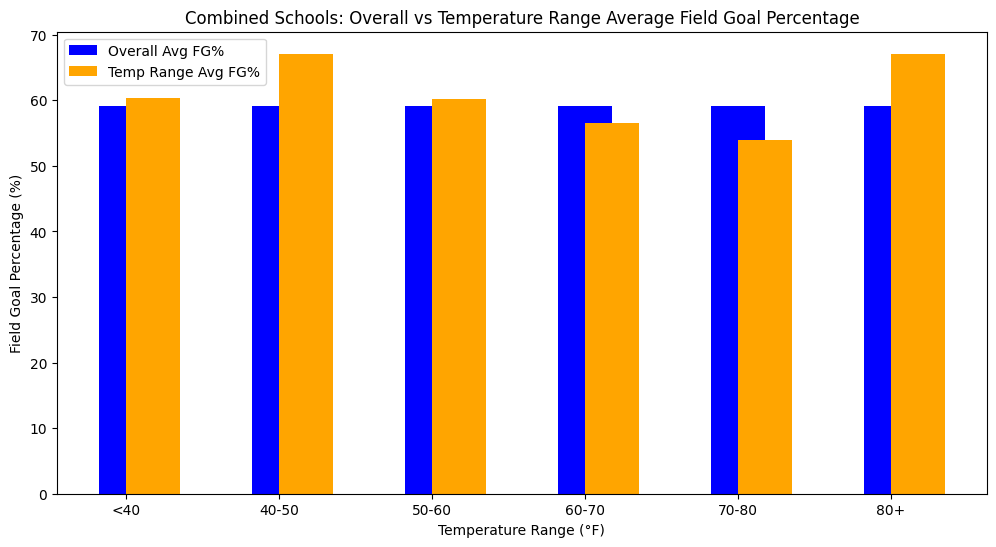

In [6]:
# Apply temperature range binning
combined_kicking['Temp_Range'] = pd.cut(
    combined_kicking['temp_f'], 
    bins=[-np.inf, 40, 50, 60, 70, 80, np.inf], 
    labels=['<40', '40-50', '50-60', '60-70', '70-80', '80+']
)

# Calculate overall average FG%
overall_avg_fg_combined = combined_kicking['fg_percentage'].mean()

# Calculate average FG% for each temperature range
temp_avg_fg_combined = combined_kicking.groupby('Temp_Range')['fg_percentage'].mean().reindex(['<40', '40-50', '50-60', '60-70', '70-80', '80+'])

# Prepare data for plotting
avg_data_combined = pd.DataFrame({
    'Temp_Range': temp_avg_fg_combined.index,
    'Overall_Avg_FG%': [overall_avg_fg_combined] * len(temp_avg_fg_combined),
    'Temp_Range_Avg_FG%': temp_avg_fg_combined.values
})

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(avg_data_combined['Temp_Range'], avg_data_combined['Overall_Avg_FG%'], width=bar_width, label='Overall Avg FG%', color='blue', align='center')
plt.bar(avg_data_combined['Temp_Range'], avg_data_combined['Temp_Range_Avg_FG%'], width=bar_width, label='Temp Range Avg FG%', color='orange', align='edge')

plt.xlabel('Temperature Range (°F)')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Combined Schools: Overall vs Temperature Range Average Field Goal Percentage')
plt.legend()

plt.show()
